In [1]:
import numpy as np
import ROOT
import uproot3
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


In [26]:
hit_pts = np.array([180.594, 109.306, 375.35,
153.256, 83.15, 258.5,
160.681, 122.975, 76.1,
142.119, 108.294, 9.8]).reshape(4,3)

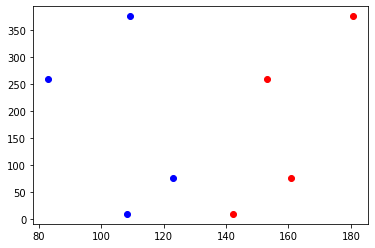

In [27]:
for x, y, z in hit_pts:
    plt.scatter(x,z, c='red')
    plt.scatter(y,z, c='blue')
plt.show()

In [52]:
dt = np.dtype([('x', np.float32),('y', np.float32),('z', np.float32)])

In [97]:
trk_pts_x = np.asarray([179.787, 70.9167, 377.2,
172.341, 85.5751, 260.5,
160.703, 108.486, 78.1,
156.472, 116.814, 11.8]).reshape(4,3)
trk_pts_y = np.asarray([179.551, 71.3815, 373.5,
172.086, 86.0776, 256.5,
160.448, 108.988, 74.1,
156.217, 117.316, 7.8]).reshape(4,3)

In [114]:
trk_pts = np.asarray([trk_pts_x, trk_pts_y])

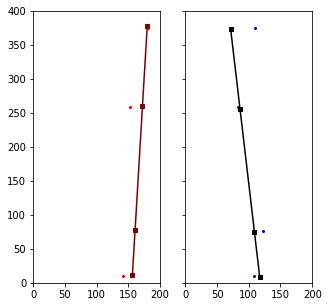

In [180]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(5,5))
colors = [['red', 'maroon'], ['blue', 'black']]
for i, col in zip([0,1], colors): 
    ax[i].scatter(hit_pts[:,i],hit_pts[:,2], c=col[0], s=4)
    ax[i].plot(trk_pts[i][:,i], trk_pts[i][:,2],'s-', c=col[1], markersize=4)
    ax[i].set_xlim(0,200)
    ax[i].set_ylim(0,400)
#ax[i].legend(loc='upper left')
plt.show()

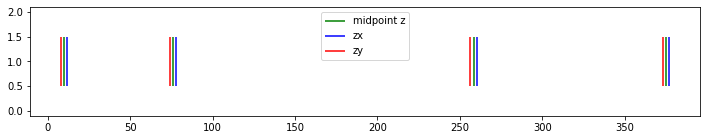

In [174]:
fig = plt.figure(figsize=(12,2))
plt.eventplot(hit_pts[:,2], color='green', label='midpoint z', orientation='horizontal')
plt.eventplot(trk_pts_x[:,2], color='blue', label='zx',orientation='horizontal')
plt.eventplot(trk_pts_y[:,2], color='red', label='zy',orientation='horizontal')
plt.legend(loc='upper center')
plt.show()

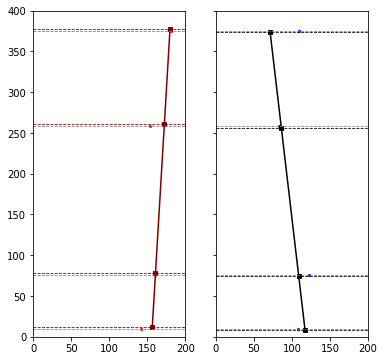

In [195]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(6,6))
colors = [['red', 'maroon'], ['blue', 'black']]
for i, col in zip([0,1], colors): 
    ax[i].scatter(hit_pts[:,i],hit_pts[:,2], c=col[0], s=4)
    ax[i].plot(trk_pts[i][:,i], trk_pts[i][:,2],'s-', c=col[1], markersize=4)
    ax[i].set_xlim(0,200)
    ax[i].set_ylim(0,400)
#ax[i].legend(loc='upper left')
    for j in range(4):
        ax[i].axhline(hit_pts[:,2][j], linestyle='--', c='gray', linewidth=.8)
        ax[i].axhline(trk_pts[i][:,2][j], linestyle='--', c=col[1], linewidth=.8)
plt.show()

In [198]:
uTrack_line = np.asarray([179.551, 70.9167, 377.2,
172.086, 85.5751, 260.5]).reshape(2,3)
lTrack_line = np.asarray([160.448, 108.486, 78.1,
156.217, 116.814, 11.8]).reshape(2,3)
UL_trk_line = np.asarray([uTrack_line, lTrack_line])

In [201]:
def twopt_line(x, x1, x2, y1, y2):
    return x*((y2-y1)/(x2-x1))-x1*((y2-y1)/(x2-x1)) + y1

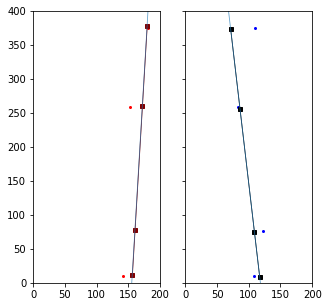

In [209]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(5,5))
colors = [['red', 'maroon'], ['blue', 'black']]
xx = np.arange(200)
for i, col in zip([0,1], colors): 
    ax[i].scatter(hit_pts[:,i],hit_pts[:,2], c=col[0], s=4)
    ax[i].plot(trk_pts[i][:,i], trk_pts[i][:,2],'s-', c=col[1], markersize=4, linewidth=.8)
    ax[i].plot(twopt_line(xx,*UL_trk_line[i][:,i], *UL_trk_line[i][:,2]), alpha=.7, linewidth=.8)
    ax[i].set_xlim(0,200)
    ax[i].set_ylim(0,400)
#ax[i].legend(loc='upper left')

plt.show()